ROLL NO: CH.SC.U4CSE23225

Part 2: Support Vector Machine (SVM)
2.1 SVM Example from Lab Manual (Pima Diabetes Dataset)

--- SVM with RBF Kernel ---
Accuracy Score: 0.7965
Accuracy in Percentage: 79%

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       160
           1       0.66      0.69      0.68        71

    accuracy                           0.80       231
   macro avg       0.76      0.77      0.76       231
weighted avg       0.80      0.80      0.80       231



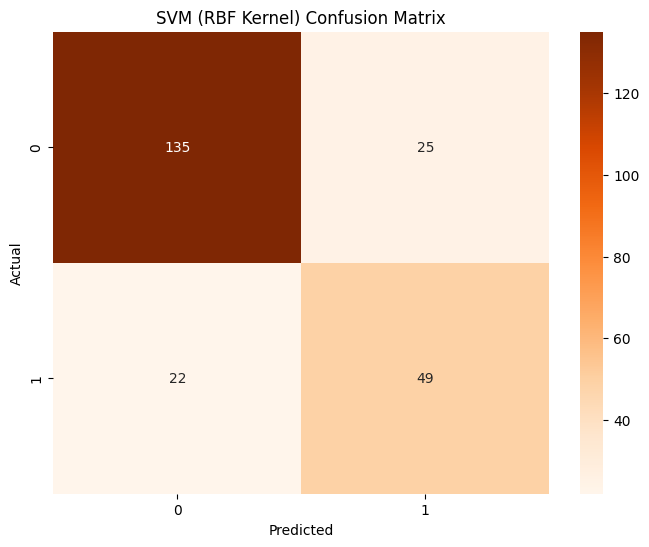


--- SVM with Linear Kernel ---
Accuracy Score: 0.7965
Accuracy in Percentage: 79%

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       160
           1       0.67      0.68      0.67        71

    accuracy                           0.80       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.80      0.80      0.80       231



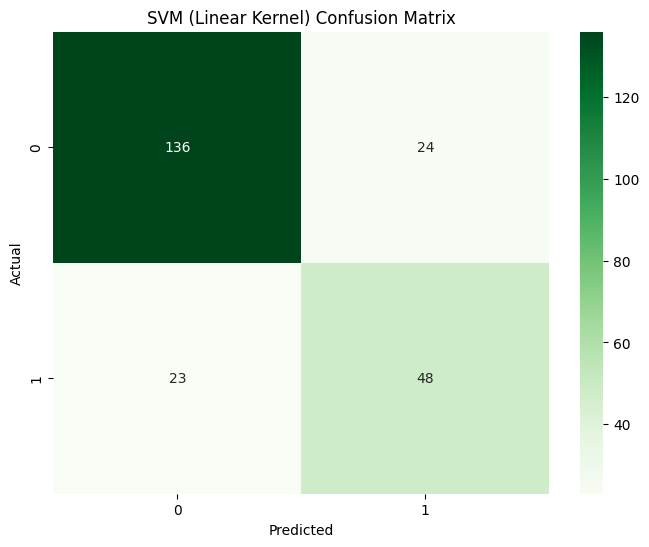

In [1]:
# Cell 4: SVM Example from Lab Manual

# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Import the Dataset (using the same data as before)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima_df = pd.read_csv(url, header=None, names=col_names)

# Step 3: Assign Dependent and Independent variables
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = pima_df[feature_cols] # Features
y = pima_df.label       # Target variable

# Step 4: Split the data into Training and Testing Datasets
# Using a 70/30 split as suggested in the manual's screenshot (test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# Step 5: Preprocessing Data with StandardScaler
# Feature scaling is crucial for distance-based algorithms like SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Model 1: SVM with 'rbf' kernel ---
print("--- SVM with RBF Kernel ---")
# Step 6a: Fit the Model (SVM with rbf kernel)
svc_rbf = SVC(kernel='rbf', random_state=0)
svc_rbf.fit(X_train_scaled, y_train)

# Step 7a: Make Predictions
y_pred_rbf = svc_rbf.predict(X_test_scaled)

# Step 8a: Evaluate the Model
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy Score: {accuracy_rbf:.4f}")
print(f"Accuracy in Percentage: {int(accuracy_rbf*100)}%\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_rbf))

# Visualize the Confusion Matrix
conf_mat_rbf = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_rbf, annot=True, fmt='d', cmap='Oranges')
plt.title('SVM (RBF Kernel) Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# --- Model 2: SVM with 'linear' kernel ---
print("\n--- SVM with Linear Kernel ---")
# Step 6b: Fit the Model (SVM with linear kernel)
svc_linear = SVC(kernel='linear', random_state=0)
svc_linear.fit(X_train_scaled, y_train)

# Step 7b: Make Predictions
y_pred_linear = svc_linear.predict(X_test_scaled)

# Step 8b: Evaluate the Model
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy Score: {accuracy_linear:.4f}")
print(f"Accuracy in Percentage: {int(accuracy_linear*100)}%\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_linear))

# Visualize the Confusion Matrix
conf_mat_linear = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_linear, annot=True, fmt='d', cmap='Greens')
plt.title('SVM (Linear Kernel) Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

2.2 SVM Exercises (Exercise 8.6)

We will generate non-linear data and show how an SVM with an RBF kernel can successfully classify it by visualizing the decision boundary.

Model Accuracy: 0.9333


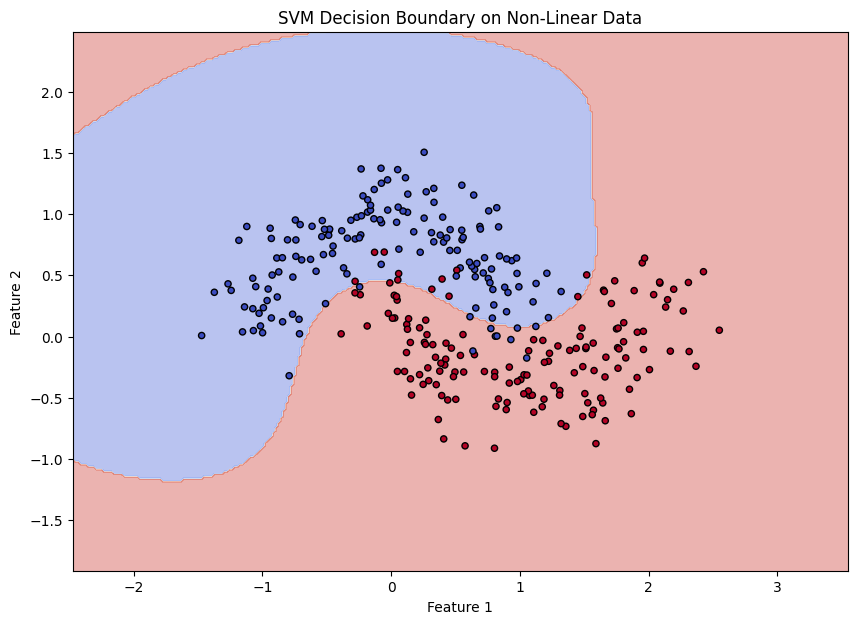

In [2]:
# Cell 5: Exercise 8.6.1 - SVM on Quadratic (Non-linear) Data

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Generate a random dataset with a non-linear (moon-shaped) distribution
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train the SVM model with an RBF kernel (suitable for non-linear data)
svm_clf = SVC(kernel='rbf', gamma='auto', C=1.0)
svm_clf.fit(X_train_scaled, y_train)

# Step 5: Evaluate the model
y_pred = svm_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Step 6: Visualize the decision boundary
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = clf.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap='coolwarm')
    plt.title("SVM Decision Boundary on Non-Linear Data")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.figure(figsize=(10, 7))
plot_decision_boundary(svm_clf, X, y)
plt.show()

We will create a simple dataset and use SVM to classify emails as spam or not spam.

Sample Spam Classification Dataset:
   word_frequency  message_length  is_spam
0            0.50             250        1
1            0.10              80        0
2            0.80             300        1
3            0.20             120        0
4            0.90             280        1
5            0.00              50        0
6            0.70             320        1
7            0.30             150        0
8            1.00             400        1
9            0.15              90        0

--- Model Evaluation on Test Data ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



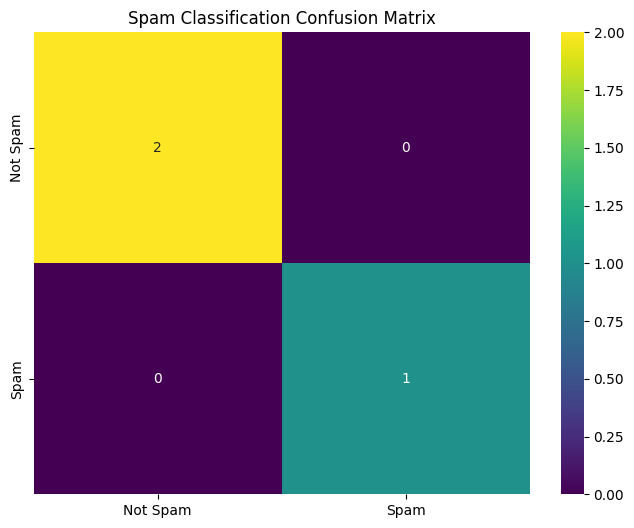

In [3]:
# Cell 6: Exercise 8.6.2 - Spam Email Classification

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a sample dataset for spam classification
# Features: frequency of certain words (e.g., 'free', 'win'), message length
data = {
    'word_frequency': [0.5, 0.1, 0.8, 0.2, 0.9, 0.0, 0.7, 0.3, 1.0, 0.15],
    'message_length': [250, 80, 300, 120, 280, 50, 320, 150, 400, 90],
    'is_spam': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0] # 1: Spam, 0: Not Spam
}
df_spam = pd.DataFrame(data)
print("Sample Spam Classification Dataset:")
print(df_spam)

# Step 2: Define features and target
X = df_spam[['word_frequency', 'message_length']]
y = df_spam['is_spam']

# Step 3: Split the data
# With a tiny dataset, splitting is optional, but we'll do it for good practice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Scale the features
# Important because word_frequency (0-1) and message_length (50-400) are on very different scales
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train the SVM model (a linear kernel is often a good start for text-like data)
spam_clf = SVC(kernel='linear', random_state=42)
spam_clf.fit(X_train_scaled, y_train)

# Step 6: Evaluate the model
y_pred = spam_clf.predict(X_test_scaled)
print("\n--- Model Evaluation on Test Data ---")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='viridis', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title("Spam Classification Confusion Matrix")
plt.show()